# Train Log 20181020

## Results
```
2018-10-20 22:03:23.129172   Train one epoch  20 /  20


100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 22:06:59.149954  [Epoch 19] mean loss: 0.000110
2018-10-20 22:06:59.150319  [Epoch 19] accuracy: 0.989940
2018-10-20 22:06:59.150727  [Epoch 19] avg class acc: 0.958715
2018-10-20 22:06:59.151349  [Epoch 19] indivisual [0] class recall: 0.979592
2018-10-20 22:06:59.151505  [Epoch 19] indivisual [0] class precision: 0.986301
2018-10-20 22:06:59.151909  [Epoch 19] indivisual [1] class recall: 1.000000
2018-10-20 22:06:59.152175  [Epoch 19] indivisual [1] class precision: 0.986667
2018-10-20 22:06:59.152434  [Epoch 19] indivisual [2] class recall: 0.896552
2018-10-20 22:06:59.152845  [Epoch 19] indivisual [2] class precision: 0.896552
2018-10-20 22:06:59.152952   Evaluation one (validation set) epoch  20 /  20


100%|██████████| 58/58 [00:12<00:00,  4.61it/s]

2018-10-20 22:07:11.863703  [Epoch 19] vali mean loss: 0.000442
2018-10-20 22:07:11.863956  [Epoch 19] vali accuracy: 0.999931
2018-10-20 22:07:11.864628  [Epoch 19] vali avg class acc: 1.000000
2018-10-20 22:07:11.864972  [Epoch 19] vali indivisual [0] class recall: 1.000000
2018-10-20 22:07:11.865166  [Epoch 19] vali indivisual [0] class precision: 1.000000
2018-10-20 22:07:11.865425  [Epoch 19] vali indivisual [1] class recall: 1.000000
2018-10-20 22:07:11.865612  [Epoch 19] vali indivisual [1] class precision: 1.000000
2018-10-20 22:07:11.866187  [Epoch 19] vali indivisual [2] class recall: 1.000000
2018-10-20 22:07:11.866473  [Epoch 19] vali indivisual [2] class precision: 1.000000
2018-10-20 22:07:11.866910   Evaluation one (test set) epoch  20 /  20


100%|██████████| 58/58 [00:12<00:00,  4.61it/s]

2018-10-20 22:07:24.562048  [Epoch 19] test mean loss: 0.000442
2018-10-20 22:07:24.562787  [Epoch 19] test accuracy: 0.999517
2018-10-20 22:07:24.563175  [Epoch 19] test avg class acc: 1.000000
2018-10-20 22:07:24.563728  [Epoch 19] test indivisual [0] class recall: 1.000000
2018-10-20 22:07:24.563935  [Epoch 19] test indivisual [0] class precision: 1.000000
2018-10-20 22:07:24.564092  [Epoch 19] test indivisual [1] class recall: 1.000000
2018-10-20 22:07:24.564236  [Epoch 19] test indivisual [1] class precision: 1.000000
2018-10-20 22:07:24.564399  [Epoch 19] test indivisual [2] class recall: 1.000000
2018-10-20 22:07:24.564974  [Epoch 19] test indivisual [2] class precision: 1.000000

```

## Trained model
* [Download link](https://drive.google.com/open?id=1oivFL4cW1jdyrTb_ReS2ujMjSryDAwj9)

In [12]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import time , datetime

sys.path.append( os.path.abspath('../../../Dataset/scripts'))
from utils import *

sys.path.append( os.path.abspath('../../model') )
from train import *
import model as MODEL

In [13]:
""" Path """

data_train_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_20181019_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_20181019_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_20181019_ndb_aug_v2_20181020/vali.h5')

log_path = os.path.abspath('./train_log_20181020.txt')

model_save_path = os.path.abspath('./model')
if not os.path.isdir(model_save_path) : os.mkdir(model_save_path)

""" Parameters """
GPU_INDEX = 0
NUM_POINT = 256
NUM_CLASSES = 3

BN_INIT_DECAY = 0.5
BN_DECAY_DECAY_RATE = 0.5
BN_DECAY_DECAY_STEP = float(200000)
BN_DECAY_CLIP = 0.99
DECAY_STEP = BN_DECAY_DECAY_STEP
DECAY_RATE = BN_DECAY_DECAY_RATE

BATCH_SIZE = 250

MOMENTUM = 0.9

BASE_LEARNING_RATE = 0.001

OPTIMIZER = 'adam'

MAX_EPOCH = 20

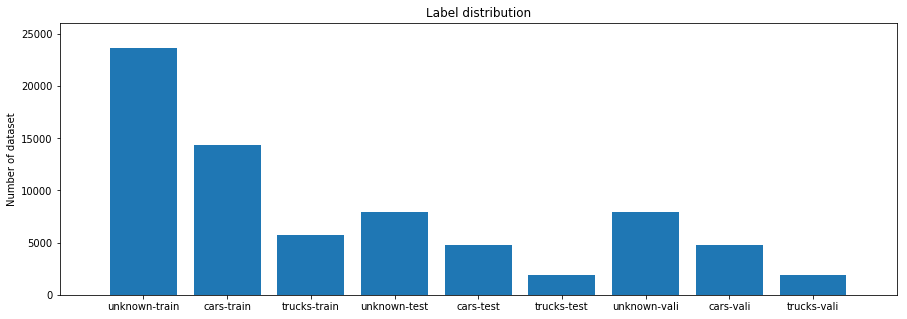

In [14]:
""" Load dataset"""

data = []
label = []

data_train, label_train = load_h5(data_train_path)
data_vali, label_vali = load_h5(data_vali_path)
data_test, label_test = load_h5(data_test_path)

data.append(data_train)
data.append(data_vali)
data.append(data_test)

label.append(label_train)
label.append(label_vali)
label.append(label_test)

""" Data statistics"""

label_list = [0,1,2]

y_val = []
for i in range( len ( data) ):
    for j in range ( len ( label_list ) ):
        y_val.append(np.sum(label[i] == label_list[j]))

x_name=('unknown-train', 'cars-train', 'trucks-train', 
        'unknown-test', 'cars-test', 'trucks-test', 
        'unknown-vali', 'cars-vali', 'trucks-vali')

index = range( len(x_name) )

plt.figure(figsize=(15,5))
plt.bar(index, y_val, tick_label=x_name, align='center')
plt.ylabel('Number of dataset')
plt.title('Label distribution')
plt.xlim( -1, len(x_name))
plt.ylim( 0, np.max(y_val) * 1.1 )
plt.show()

In [15]:
""" log file """
LOG_FOUT = open(log_path, 'w')

def log_string(out_str):
    out_str = str( datetime.datetime.fromtimestamp( time.time() ) ) + "  " + out_str
    LOG_FOUT.write(out_str+'\n')
    LOG_FOUT.flush()
    print(out_str)
    
    
def get_learning_rate(batch):
    learning_rate = tf.train.exponential_decay(
                        BASE_LEARNING_RATE,  # Base learning rate.
                        batch * BATCH_SIZE,  # Current index into the dataset.
                        DECAY_STEP,          # Decay step.
                        DECAY_RATE,          # Decay rate.
                        staircase=True)
    learning_rate = tf.maximum(learning_rate, 0.00001) # CLIP THE LEARNING RATE!
    return learning_rate        

def get_bn_decay(batch):
    bn_momentum = tf.train.exponential_decay(
                      BN_INIT_DECAY,
                      batch * BATCH_SIZE,
                      BN_DECAY_DECAY_STEP,
                      BN_DECAY_DECAY_RATE,
                      staircase=True)
    bn_decay = tf.minimum(BN_DECAY_CLIP, 1 - bn_momentum)
    return bn_decay

""" load traing model """
with tf.Graph().as_default():
    with tf.device('/gpu:'+str(GPU_INDEX)):
        pointclouds_pl, labels_pl = MODEL.placeholder_inputs(BATCH_SIZE, NUM_POINT)
        is_training_pl = tf.placeholder(tf.bool, shape=())
        print(is_training_pl)

        # Note the global_step=batch parameter to minimize. 
        # That tells the optimizer to helpfully increment the 'batch' parameter for you every time it trains.
        batch = tf.Variable(0)
        bn_decay = get_bn_decay(batch)
        tf.summary.scalar('bn_decay', bn_decay)

        # Get model and loss 
        pred, end_points = MODEL.get_model(pointclouds_pl, is_training_pl, bn_decay=bn_decay)
        loss = MODEL.get_loss(pred, labels_pl, end_points)
        tf.summary.scalar('loss', loss)

        correct = tf.equal(tf.argmax(pred, 1), tf.to_int64(labels_pl))
        accuracy = tf.reduce_sum(tf.cast(correct, tf.float32)) / float(BATCH_SIZE)
        tf.summary.scalar('accuracy', accuracy)

        # Get training operator
        learning_rate = get_learning_rate(batch)
        tf.summary.scalar('learning_rate', learning_rate)
        if OPTIMIZER == 'momentum':
            optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=MOMENTUM)
        elif OPTIMIZER == 'adam':
            optimizer = tf.train.AdamOptimizer(learning_rate)
        train_op = optimizer.minimize(loss, global_step=batch)

        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()

    # Create a session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True
    config.log_device_placement = False
    sess = tf.Session(config=config)

    # Add summary writers
    #merged = tf.merge_all_summaries()
    merged = tf.summary.merge_all()

    train_writer_path = os.path.abspath('./train')
    if os.path.isdir(train_writer_path): os.system('rm -r {}'.format(train_writer_path))
    os.mkdir(train_writer_path)
        
    test_writer_path = os.path.abspath('./test')
    if os.path.isdir(test_writer_path): os.system('rm -r {}'.format(test_writer_path))
    os.mkdir(test_writer_path)
    
    
    train_writer = tf.summary.FileWriter(train_writer_path, sess.graph)
    test_writer = tf.summary.FileWriter(test_writer_path)
    
    
    # Init variables
    init = tf.global_variables_initializer()
    # To fix the bug introduced in TF 0.12.1 as in
    # http://stackoverflow.com/questions/41543774/invalidargumenterror-for-tensor-bool-tensorflow-0-12-1
    #sess.run(init)
    sess.run(init, {is_training_pl: True})

    ops = {'pointclouds_pl': pointclouds_pl,
           'labels_pl': labels_pl,
           'is_training_pl': is_training_pl,
           'pred': pred,
           'loss': loss,
           'train_op': train_op,
           'merged': merged,
           'step': batch}
    
    data_train = np.concatenate(data[:2])
    label_train = np.concatenate(label[:2])
    
    data_vali = data[1]
    label_vali = label[1]
    
    data_test = data[2]
    label_test = label[2]
    
        
    for epoch in range(MAX_EPOCH):
        
        ## Training
        log_string ( " Train one epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = True
        
        # Shuffle train files
        train_file_idxs = np.arange(0, data_train.shape[0])
        np.random.shuffle(train_file_idxs)
        
        current_data = data_train[train_file_idxs] 
        current_label = label_train[train_file_idxs]
              
        ## Evaluation metric
        total_correct = 0
        total_seen = 0
        loss_sum = 0
        
        total_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
            
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE           

            # Augment batched point clouds by rotation and jittering
            rotated_data = provider.rotate_point_cloud(current_data[start_idx:end_idx, :, :])
            jittered_data = provider.jitter_point_cloud(rotated_data)
            
            feed_dict = {ops['pointclouds_pl']: jittered_data,
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training,}
            
            summary, step, _, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['train_op'], ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            train_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            loss_sum += loss_val
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    


        ## Evaluation using validation set    
        log_string ( " Evaluation one (validation set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle validation files
        file_idxs = np.arange(0, data_vali.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_vali[file_idxs]
        current_label = label_vali[file_idxs]
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            # test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] vali mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class) / np.array(total_class) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] vali indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] vali indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
            
        ## Evaluation using test set    
        log_string ( " Evaluation one (test set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle test files
        file_idxs = np.arange(0, data_test.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_test[file_idxs]
        current_label = label_test[file_idxs]
        
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] test mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] test accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] test avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] test indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] test indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
 
        # Save the variables to disk.
        if epoch % 10 == 0:
            save_path = saver.save(sess, os.path.join(model_save_path, "model.ckpt"))
            log_string("Model saved in file: %s" % save_path)
                

Tensor("Placeholder_2:0", shape=(), dtype=bool, device=/device:GPU:0)
INFO:tensorflow:Summary name classify loss is illegal; using classify_loss instead.
INFO:tensorflow:Summary name mat loss is illegal; using mat_loss instead.
2018-10-20 20:47:04.201546   Train one epoch   1 /  20


100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-20 20:50:35.127089  [Epoch 0] mean loss: 0.003471
2018-10-20 20:50:35.127659  [Epoch 0] accuracy: 0.774884
2018-10-20 20:50:35.128211  [Epoch 0] avg class acc: 0.822740
2018-10-20 20:50:35.128430  [Epoch 0] indivisual [0] class recall: 0.915493
2018-10-20 20:50:35.128965  [Epoch 0] indivisual [0] class precision: 0.902778
2018-10-20 20:50:35.129166  [Epoch 0] indivisual [1] class recall: 0.946667
2018-10-20 20:50:35.129518  [Epoch 0] indivisual [1] class precision: 0.922078
2018-10-20 20:50:35.129962  [Epoch 0] indivisual [2] class recall: 0.606061
2018-10-20 20:50:35.130130  [Epoch 0] indivisual [2] class precision: 0.689655
2018-10-20 20:50:35.130373   Evaluation one (validation set) epoch   1 /  20



100%|██████████| 58/58 [00:12<00:00,  4.60it/s]

2018-10-20 20:50:47.890386  [Epoch 0] vali mean loss: 0.013944
2018-10-20 20:50:47.890833  [Epoch 0] vali accuracy: 0.877724
2018-10-20 20:50:47.891218  [Epoch 0] vali avg class acc: 0.333333
2018-10-20 20:50:47.891479  [Epoch 0] vali indivisual [0] class recall: 0.832061
2018-10-20 20:50:47.892289  [Epoch 0] vali indivisual [0] class precision: 0.886179
2018-10-20 20:50:47.892666  [Epoch 0] vali indivisual [1] class recall: 1.000000
2018-10-20 20:50:47.892772  [Epoch 0] vali indivisual [1] class precision: 0.913043
2018-10-20 20:50:47.893002  [Epoch 0] vali indivisual [2] class recall: 0.514286
2018-10-20 20:50:47.893306  [Epoch 0] vali indivisual [2] class precision: 0.514286
2018-10-20 20:50:47.893445   Evaluation one (test set) epoch   1 /  20



100%|██████████| 58/58 [00:12<00:00,  4.65it/s]


2018-10-20 20:51:00.439063  [Epoch 0] test mean loss: 0.013944
2018-10-20 20:51:00.439745  [Epoch 0] test accuracy: 0.874345
2018-10-20 20:51:00.440200  [Epoch 0] test avg class acc: 0.838174
2018-10-20 20:51:00.440564  [Epoch 0] test indivisual [0] class recall: 0.884892
2018-10-20 20:51:00.440897  [Epoch 0] test indivisual [0] class precision: 0.924812
2018-10-20 20:51:00.441061  [Epoch 0] test indivisual [1] class recall: 1.000000
2018-10-20 20:51:00.441408  [Epoch 0] test indivisual [1] class precision: 0.943820
2018-10-20 20:51:00.441562  [Epoch 0] test indivisual [2] class recall: 0.629630
2018-10-20 20:51:00.441916  [Epoch 0] test indivisual [2] class precision: 0.607143
2018-10-20 20:51:01.337740  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181020/model/model.ckpt
2018-10-20 20:51:01.338194   Train one epoch   2 /  20


100%|██████████| 233/233 [03:34<00:00,  1.09it/s]

2018-10-20 20:54:35.975809  [Epoch 1] mean loss: 0.001299
2018-10-20 20:54:35.976240  [Epoch 1] accuracy: 0.879176
2018-10-20 20:54:35.976910  [Epoch 1] avg class acc: 0.876633
2018-10-20 20:54:35.977229  [Epoch 1] indivisual [0] class recall: 0.909722
2018-10-20 20:54:35.977516  [Epoch 1] indivisual [0] class precision: 0.942446
2018-10-20 20:54:35.977957  [Epoch 1] indivisual [1] class recall: 0.986842
2018-10-20 20:54:35.978074  [Epoch 1] indivisual [1] class precision: 0.949367
2018-10-20 20:54:35.978328  [Epoch 1] indivisual [2] class recall: 0.733333
2018-10-20 20:54:35.978584  [Epoch 1] indivisual [2] class precision: 0.687500
2018-10-20 20:54:35.978790   Evaluation one (validation set) epoch   2 /  20



100%|██████████| 58/58 [00:12<00:00,  4.64it/s]

2018-10-20 20:54:48.590806  [Epoch 1] vali mean loss: 0.005218
2018-10-20 20:54:48.591931  [Epoch 1] vali accuracy: 0.937379
2018-10-20 20:54:48.592227  [Epoch 1] vali avg class acc: 0.333333
2018-10-20 20:54:48.592445  [Epoch 1] vali indivisual [0] class recall: 0.941176
2018-10-20 20:54:48.592789  [Epoch 1] vali indivisual [0] class precision: 0.977099
2018-10-20 20:54:48.592963  [Epoch 1] vali indivisual [1] class recall: 1.000000
2018-10-20 20:54:48.593444  [Epoch 1] vali indivisual [1] class precision: 1.000000
2018-10-20 20:54:48.593583  [Epoch 1] vali indivisual [2] class recall: 0.888889
2018-10-20 20:54:48.593882  [Epoch 1] vali indivisual [2] class precision: 0.750000
2018-10-20 20:54:48.594018   Evaluation one (test set) epoch   2 /  20



100%|██████████| 58/58 [00:12<00:00,  4.62it/s]

2018-10-20 20:55:01.241733  [Epoch 1] test mean loss: 0.005218
2018-10-20 20:55:01.242553  [Epoch 1] test accuracy: 0.938207
2018-10-20 20:55:01.243035  [Epoch 1] test avg class acc: 0.910985
2018-10-20 20:55:01.243552  [Epoch 1] test indivisual [0] class recall: 0.937500
2018-10-20 20:55:01.243703  [Epoch 1] test indivisual [0] class precision: 0.937500
2018-10-20 20:55:01.243983  [Epoch 1] test indivisual [1] class recall: 1.000000
2018-10-20 20:55:01.244394  [Epoch 1] test indivisual [1] class precision: 0.962963
2018-10-20 20:55:01.244650  [Epoch 1] test indivisual [2] class recall: 0.795455
2018-10-20 20:55:01.244752  [Epoch 1] test indivisual [2] class precision: 0.853659
2018-10-20 20:55:01.245112   Train one epoch   3 /  20



100%|██████████| 233/233 [03:36<00:00,  1.08it/s]

2018-10-20 20:58:38.098692  [Epoch 2] mean loss: 0.001053
2018-10-20 20:58:38.099273  [Epoch 2] accuracy: 0.900343
2018-10-20 20:58:38.099731  [Epoch 2] avg class acc: 0.888918
2018-10-20 20:58:38.100019  [Epoch 2] indivisual [0] class recall: 0.974576
2018-10-20 20:58:38.100359  [Epoch 2] indivisual [0] class precision: 0.905512
2018-10-20 20:58:38.100510  [Epoch 2] indivisual [1] class recall: 0.989474
2018-10-20 20:58:38.101053  [Epoch 2] indivisual [1] class precision: 0.979167
2018-10-20 20:58:38.101159  [Epoch 2] indivisual [2] class recall: 0.702703
2018-10-20 20:58:38.101425  [Epoch 2] indivisual [2] class precision: 0.962963
2018-10-20 20:58:38.101700   Evaluation one (validation set) epoch   3 /  20



100%|██████████| 58/58 [00:12<00:00,  4.55it/s]

2018-10-20 20:58:50.964925  [Epoch 2] vali mean loss: 0.004228
2018-10-20 20:58:50.965533  [Epoch 2] vali accuracy: 0.948069
2018-10-20 20:58:50.965951  [Epoch 2] vali avg class acc: 0.000000
2018-10-20 20:58:50.966225  [Epoch 2] vali indivisual [0] class recall: 0.972222
2018-10-20 20:58:50.966499  [Epoch 2] vali indivisual [0] class precision: 0.939597
2018-10-20 20:58:50.966660  [Epoch 2] vali indivisual [1] class recall: 0.974684
2018-10-20 20:58:50.966854  [Epoch 2] vali indivisual [1] class precision: 0.987179
2018-10-20 20:58:50.966999  [Epoch 2] vali indivisual [2] class recall: 0.703704
2018-10-20 20:58:50.967648  [Epoch 2] vali indivisual [2] class precision: 0.826087
2018-10-20 20:58:50.967746   Evaluation one (test set) epoch   3 /  20



100%|██████████| 58/58 [00:12<00:00,  4.60it/s]

2018-10-20 20:59:03.706305  [Epoch 2] test mean loss: 0.004228
2018-10-20 20:59:03.707186  [Epoch 2] test accuracy: 0.940966
2018-10-20 20:59:03.707931  [Epoch 2] test avg class acc: 0.919452
2018-10-20 20:59:03.708290  [Epoch 2] test indivisual [0] class recall: 0.930769
2018-10-20 20:59:03.708651  [Epoch 2] test indivisual [0] class precision: 0.960317
2018-10-20 20:59:03.709478  [Epoch 2] test indivisual [1] class recall: 1.000000
2018-10-20 20:59:03.709923  [Epoch 2] test indivisual [1] class precision: 0.989130
2018-10-20 20:59:03.710372  [Epoch 2] test indivisual [2] class recall: 0.827586
2018-10-20 20:59:03.710590  [Epoch 2] test indivisual [2] class precision: 0.750000
2018-10-20 20:59:03.711145   Train one epoch   4 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:02:39.439586  [Epoch 3] mean loss: 0.000692
2018-10-20 21:02:39.440537  [Epoch 3] accuracy: 0.930592
2018-10-20 21:02:39.441222  [Epoch 3] avg class acc: 0.944659
2018-10-20 21:02:39.441559  [Epoch 3] indivisual [0] class recall: 0.918919
2018-10-20 21:02:39.441782  [Epoch 3] indivisual [0] class precision: 0.978417
2018-10-20 21:02:39.442254  [Epoch 3] indivisual [1] class recall: 0.986486
2018-10-20 21:02:39.442368  [Epoch 3] indivisual [1] class precision: 0.973333
2018-10-20 21:02:39.442748  [Epoch 3] indivisual [2] class recall: 0.928571
2018-10-20 21:02:39.442940  [Epoch 3] indivisual [2] class precision: 0.722222
2018-10-20 21:02:39.443069   Evaluation one (validation set) epoch   4 /  20



100%|██████████| 58/58 [00:12<00:00,  4.56it/s]

2018-10-20 21:02:52.302487  [Epoch 3] vali mean loss: 0.002781
2018-10-20 21:02:52.302742  [Epoch 3] vali accuracy: 0.976276
2018-10-20 21:02:52.303052  [Epoch 3] vali avg class acc: 0.666667
2018-10-20 21:02:52.303292  [Epoch 3] vali indivisual [0] class recall: 1.000000
2018-10-20 21:02:52.303514  [Epoch 3] vali indivisual [0] class precision: 0.942857
2018-10-20 21:02:52.303761  [Epoch 3] vali indivisual [1] class recall: 1.000000
2018-10-20 21:02:52.303890  [Epoch 3] vali indivisual [1] class precision: 1.000000
2018-10-20 21:02:52.304438  [Epoch 3] vali indivisual [2] class recall: 0.764706
2018-10-20 21:02:52.305075  [Epoch 3] vali indivisual [2] class precision: 1.000000
2018-10-20 21:02:52.305352   Evaluation one (test set) epoch   4 /  20



100%|██████████| 58/58 [00:12<00:00,  4.58it/s]

2018-10-20 21:03:05.050582  [Epoch 3] test mean loss: 0.002781
2018-10-20 21:03:05.050855  [Epoch 3] test accuracy: 0.973448
2018-10-20 21:03:05.051298  [Epoch 3] test avg class acc: 0.959596
2018-10-20 21:03:05.051880  [Epoch 3] test indivisual [0] class recall: 1.000000
2018-10-20 21:03:05.052035  [Epoch 3] test indivisual [0] class precision: 0.971631
2018-10-20 21:03:05.052270  [Epoch 3] test indivisual [1] class recall: 1.000000
2018-10-20 21:03:05.052524  [Epoch 3] test indivisual [1] class precision: 1.000000
2018-10-20 21:03:05.052769  [Epoch 3] test indivisual [2] class recall: 0.878788
2018-10-20 21:03:05.053090  [Epoch 3] test indivisual [2] class precision: 1.000000
2018-10-20 21:03:05.053348   Train one epoch   5 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:06:41.077389  [Epoch 4] mean loss: 0.000493
2018-10-20 21:06:41.077723  [Epoch 4] accuracy: 0.949442
2018-10-20 21:06:41.078131  [Epoch 4] avg class acc: 0.916160
2018-10-20 21:06:41.078803  [Epoch 4] indivisual [0] class recall: 0.942029
2018-10-20 21:06:41.079092  [Epoch 4] indivisual [0] class precision: 0.962963
2018-10-20 21:06:41.079352  [Epoch 4] indivisual [1] class recall: 1.000000
2018-10-20 21:06:41.079491  [Epoch 4] indivisual [1] class precision: 0.964286
2018-10-20 21:06:41.079691  [Epoch 4] indivisual [2] class recall: 0.806452
2018-10-20 21:06:41.080059  [Epoch 4] indivisual [2] class precision: 0.806452
2018-10-20 21:06:41.080313   Evaluation one (validation set) epoch   5 /  20



100%|██████████| 58/58 [00:12<00:00,  4.61it/s]

2018-10-20 21:06:53.788908  [Epoch 4] vali mean loss: 0.001981
2018-10-20 21:06:53.789843  [Epoch 4] vali accuracy: 0.964000
2018-10-20 21:06:53.790408  [Epoch 4] vali avg class acc: 0.333333
2018-10-20 21:06:53.790803  [Epoch 4] vali indivisual [0] class recall: 0.945312
2018-10-20 21:06:53.790959  [Epoch 4] vali indivisual [0] class precision: 0.991803
2018-10-20 21:06:53.791199  [Epoch 4] vali indivisual [1] class recall: 1.000000
2018-10-20 21:06:53.791458  [Epoch 4] vali indivisual [1] class precision: 1.000000
2018-10-20 21:06:53.791708  [Epoch 4] vali indivisual [2] class recall: 0.972973
2018-10-20 21:06:53.791857  [Epoch 4] vali indivisual [2] class precision: 0.837209
2018-10-20 21:06:53.792079   Evaluation one (test set) epoch   5 /  20



100%|██████████| 58/58 [00:12<00:00,  4.61it/s]

2018-10-20 21:07:06.489423  [Epoch 4] test mean loss: 0.001981
2018-10-20 21:07:06.489896  [Epoch 4] test accuracy: 0.961862
2018-10-20 21:07:06.490282  [Epoch 4] test avg class acc: 0.969048
2018-10-20 21:07:06.490613  [Epoch 4] test indivisual [0] class recall: 0.907143
2018-10-20 21:07:06.490908  [Epoch 4] test indivisual [0] class precision: 1.000000
2018-10-20 21:07:06.491178  [Epoch 4] test indivisual [1] class recall: 1.000000
2018-10-20 21:07:06.491339  [Epoch 4] test indivisual [1] class precision: 0.987805
2018-10-20 21:07:06.491489  [Epoch 4] test indivisual [2] class recall: 1.000000
2018-10-20 21:07:06.491657  [Epoch 4] test indivisual [2] class precision: 0.707317
2018-10-20 21:07:06.492348   Train one epoch   6 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:10:42.618449  [Epoch 5] mean loss: 0.000473
2018-10-20 21:10:42.618786  [Epoch 5] accuracy: 0.953373
2018-10-20 21:10:42.619396  [Epoch 5] avg class acc: 0.930629
2018-10-20 21:10:42.619900  [Epoch 5] indivisual [0] class recall: 0.965035
2018-10-20 21:10:42.620063  [Epoch 5] indivisual [0] class precision: 0.958333
2018-10-20 21:10:42.620294  [Epoch 5] indivisual [1] class recall: 0.975000
2018-10-20 21:10:42.620776  [Epoch 5] indivisual [1] class precision: 0.975000
2018-10-20 21:10:42.620949  [Epoch 5] indivisual [2] class recall: 0.851852
2018-10-20 21:10:42.621319  [Epoch 5] indivisual [2] class precision: 0.884615
2018-10-20 21:10:42.621481   Evaluation one (validation set) epoch   6 /  20



100%|██████████| 58/58 [00:12<00:00,  4.62it/s]

2018-10-20 21:10:55.282063  [Epoch 5] vali mean loss: 0.001901
2018-10-20 21:10:55.282399  [Epoch 5] vali accuracy: 0.990414
2018-10-20 21:10:55.282964  [Epoch 5] vali avg class acc: 0.666667
2018-10-20 21:10:55.283295  [Epoch 5] vali indivisual [0] class recall: 0.992908
2018-10-20 21:10:55.283754  [Epoch 5] vali indivisual [0] class precision: 1.000000
2018-10-20 21:10:55.284042  [Epoch 5] vali indivisual [1] class recall: 1.000000
2018-10-20 21:10:55.284143  [Epoch 5] vali indivisual [1] class precision: 1.000000
2018-10-20 21:10:55.284515  [Epoch 5] vali indivisual [2] class recall: 1.000000
2018-10-20 21:10:55.284878  [Epoch 5] vali indivisual [2] class precision: 0.969697
2018-10-20 21:10:55.284977   Evaluation one (test set) epoch   6 /  20



100%|██████████| 58/58 [00:12<00:00,  4.62it/s]

2018-10-20 21:11:07.928534  [Epoch 5] test mean loss: 0.001901
2018-10-20 21:11:07.928987  [Epoch 5] test accuracy: 0.988138
2018-10-20 21:11:07.929420  [Epoch 5] test avg class acc: 0.995062
2018-10-20 21:11:07.929999  [Epoch 5] test indivisual [0] class recall: 0.985185
2018-10-20 21:11:07.930418  [Epoch 5] test indivisual [0] class precision: 1.000000
2018-10-20 21:11:07.930530  [Epoch 5] test indivisual [1] class recall: 1.000000
2018-10-20 21:11:07.930823  [Epoch 5] test indivisual [1] class precision: 1.000000
2018-10-20 21:11:07.931295  [Epoch 5] test indivisual [2] class recall: 1.000000
2018-10-20 21:11:07.931585  [Epoch 5] test indivisual [2] class precision: 0.957447
2018-10-20 21:11:07.931698   Train one epoch   7 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:14:44.059847  [Epoch 6] mean loss: 0.000452
2018-10-20 21:14:44.060814  [Epoch 6] accuracy: 0.955914
2018-10-20 21:14:44.061477  [Epoch 6] avg class acc: 0.983357
2018-10-20 21:14:44.061829  [Epoch 6] indivisual [0] class recall: 0.977099
2018-10-20 21:14:44.062173  [Epoch 6] indivisual [0] class precision: 0.992248
2018-10-20 21:14:44.062621  [Epoch 6] indivisual [1] class recall: 1.000000
2018-10-20 21:14:44.062734  [Epoch 6] indivisual [1] class precision: 1.000000
2018-10-20 21:14:44.062832  [Epoch 6] indivisual [2] class recall: 0.972973
2018-10-20 21:14:44.063271  [Epoch 6] indivisual [2] class precision: 0.923077
2018-10-20 21:14:44.063409   Evaluation one (validation set) epoch   7 /  20



100%|██████████| 58/58 [00:12<00:00,  4.62it/s]

2018-10-20 21:14:56.733674  [Epoch 6] vali mean loss: 0.001815
2018-10-20 21:14:56.734539  [Epoch 6] vali accuracy: 0.994828
2018-10-20 21:14:56.734866  [Epoch 6] vali avg class acc: 0.666667
2018-10-20 21:14:56.735430  [Epoch 6] vali indivisual [0] class recall: 1.000000
2018-10-20 21:14:56.735665  [Epoch 6] vali indivisual [0] class precision: 0.977941
2018-10-20 21:14:56.735885  [Epoch 6] vali indivisual [1] class recall: 1.000000
2018-10-20 21:14:56.736037  [Epoch 6] vali indivisual [1] class precision: 1.000000
2018-10-20 21:14:56.736527  [Epoch 6] vali indivisual [2] class recall: 0.918919
2018-10-20 21:14:56.736702  [Epoch 6] vali indivisual [2] class precision: 1.000000
2018-10-20 21:14:56.736966   Evaluation one (test set) epoch   7 /  20



100%|██████████| 58/58 [00:12<00:00,  4.59it/s]

2018-10-20 21:15:09.483632  [Epoch 6] test mean loss: 0.001815
2018-10-20 21:15:09.484109  [Epoch 6] test accuracy: 0.992828
2018-10-20 21:15:09.484970  [Epoch 6] test avg class acc: 0.974359
2018-10-20 21:15:09.485121  [Epoch 6] test indivisual [0] class recall: 1.000000
2018-10-20 21:15:09.485304  [Epoch 6] test indivisual [0] class precision: 0.977778
2018-10-20 21:15:09.485473  [Epoch 6] test indivisual [1] class recall: 1.000000
2018-10-20 21:15:09.485709  [Epoch 6] test indivisual [1] class precision: 1.000000
2018-10-20 21:15:09.486467  [Epoch 6] test indivisual [2] class recall: 0.923077
2018-10-20 21:15:09.486873  [Epoch 6] test indivisual [2] class precision: 1.000000
2018-10-20 21:15:09.486994   Train one epoch   8 /  20



100%|██████████| 233/233 [03:34<00:00,  1.08it/s]

2018-10-20 21:18:44.717606  [Epoch 7] mean loss: 0.000287
2018-10-20 21:18:44.718392  [Epoch 7] accuracy: 0.971674
2018-10-20 21:18:44.720246  [Epoch 7] avg class acc: 0.977778
2018-10-20 21:18:44.720661  [Epoch 7] indivisual [0] class recall: 1.000000
2018-10-20 21:18:44.720793  [Epoch 7] indivisual [0] class precision: 0.984962
2018-10-20 21:18:44.720895  [Epoch 7] indivisual [1] class recall: 1.000000
2018-10-20 21:18:44.721504  [Epoch 7] indivisual [1] class precision: 1.000000
2018-10-20 21:18:44.721769  [Epoch 7] indivisual [2] class recall: 0.933333
2018-10-20 21:18:44.721864  [Epoch 7] indivisual [2] class precision: 1.000000
2018-10-20 21:18:44.722260   Evaluation one (validation set) epoch   8 /  20



100%|██████████| 58/58 [00:12<00:00,  4.67it/s]

2018-10-20 21:18:57.282022  [Epoch 7] vali mean loss: 0.001153
2018-10-20 21:18:57.282522  [Epoch 7] vali accuracy: 0.997931
2018-10-20 21:18:57.282794  [Epoch 7] vali avg class acc: 0.666667
2018-10-20 21:18:57.282957  [Epoch 7] vali indivisual [0] class recall: 1.000000
2018-10-20 21:18:57.283734  [Epoch 7] vali indivisual [0] class precision: 0.993289
2018-10-20 21:18:57.284009  [Epoch 7] vali indivisual [1] class recall: 1.000000
2018-10-20 21:18:57.284130  [Epoch 7] vali indivisual [1] class precision: 1.000000
2018-10-20 21:18:57.284321  [Epoch 7] vali indivisual [2] class recall: 0.969697
2018-10-20 21:18:57.284750  [Epoch 7] vali indivisual [2] class precision: 1.000000
2018-10-20 21:18:57.285001   Evaluation one (test set) epoch   8 /  20



100%|██████████| 58/58 [00:12<00:00,  4.66it/s]

2018-10-20 21:19:09.822736  [Epoch 7] test mean loss: 0.001153
2018-10-20 21:19:09.823687  [Epoch 7] test accuracy: 0.996345
2018-10-20 21:19:09.824274  [Epoch 7] test avg class acc: 0.990196
2018-10-20 21:19:09.824618  [Epoch 7] test indivisual [0] class recall: 1.000000
2018-10-20 21:19:09.824802  [Epoch 7] test indivisual [0] class precision: 0.992593
2018-10-20 21:19:09.825060  [Epoch 7] test indivisual [1] class recall: 1.000000
2018-10-20 21:19:09.825273  [Epoch 7] test indivisual [1] class precision: 1.000000
2018-10-20 21:19:09.825733  [Epoch 7] test indivisual [2] class recall: 0.970588
2018-10-20 21:19:09.826028  [Epoch 7] test indivisual [2] class precision: 1.000000
2018-10-20 21:19:09.826457   Train one epoch   9 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:22:45.424879  [Epoch 8] mean loss: 0.000269
2018-10-20 21:22:45.426307  [Epoch 8] accuracy: 0.973562
2018-10-20 21:22:45.428113  [Epoch 8] avg class acc: 0.970581
2018-10-20 21:22:45.428411  [Epoch 8] indivisual [0] class recall: 0.985816
2018-10-20 21:22:45.428851  [Epoch 8] indivisual [0] class precision: 0.985816
2018-10-20 21:22:45.429157  [Epoch 8] indivisual [1] class recall: 1.000000
2018-10-20 21:22:45.429596  [Epoch 8] indivisual [1] class precision: 1.000000
2018-10-20 21:22:45.429872  [Epoch 8] indivisual [2] class recall: 0.925926
2018-10-20 21:22:45.430012  [Epoch 8] indivisual [2] class precision: 0.925926
2018-10-20 21:22:45.430407   Evaluation one (validation set) epoch   9 /  20



100%|██████████| 58/58 [00:12<00:00,  4.63it/s]

2018-10-20 21:22:58.103448  [Epoch 8] vali mean loss: 0.001079
2018-10-20 21:22:58.104425  [Epoch 8] vali accuracy: 0.992690
2018-10-20 21:22:58.105202  [Epoch 8] vali avg class acc: 0.666667
2018-10-20 21:22:58.105403  [Epoch 8] vali indivisual [0] class recall: 0.984375
2018-10-20 21:22:58.105741  [Epoch 8] vali indivisual [0] class precision: 1.000000
2018-10-20 21:22:58.106226  [Epoch 8] vali indivisual [1] class recall: 1.000000
2018-10-20 21:22:58.106703  [Epoch 8] vali indivisual [1] class precision: 1.000000
2018-10-20 21:22:58.106981  [Epoch 8] vali indivisual [2] class recall: 1.000000
2018-10-20 21:22:58.107084  [Epoch 8] vali indivisual [2] class precision: 0.942857
2018-10-20 21:22:58.107458   Evaluation one (test set) epoch   9 /  20



100%|██████████| 58/58 [00:12<00:00,  4.62it/s]

2018-10-20 21:23:10.754667  [Epoch 8] test mean loss: 0.001079
2018-10-20 21:23:10.755256  [Epoch 8] test accuracy: 0.991379
2018-10-20 21:23:10.755812  [Epoch 8] test avg class acc: 0.997531
2018-10-20 21:23:10.756109  [Epoch 8] test indivisual [0] class recall: 0.992593
2018-10-20 21:23:10.756240  [Epoch 8] test indivisual [0] class precision: 1.000000
2018-10-20 21:23:10.756902  [Epoch 8] test indivisual [1] class recall: 1.000000
2018-10-20 21:23:10.757127  [Epoch 8] test indivisual [1] class precision: 1.000000
2018-10-20 21:23:10.757293  [Epoch 8] test indivisual [2] class recall: 1.000000
2018-10-20 21:23:10.757789  [Epoch 8] test indivisual [2] class precision: 0.967742
2018-10-20 21:23:10.758184   Train one epoch  10 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:26:46.456412  [Epoch 9] mean loss: 0.000253
2018-10-20 21:26:46.457493  [Epoch 9] accuracy: 0.975639
2018-10-20 21:26:46.458313  [Epoch 9] avg class acc: 0.927135
2018-10-20 21:26:46.458662  [Epoch 9] indivisual [0] class recall: 0.969925
2018-10-20 21:26:46.458898  [Epoch 9] indivisual [0] class precision: 0.962687
2018-10-20 21:26:46.459353  [Epoch 9] indivisual [1] class recall: 0.987952
2018-10-20 21:26:46.459648  [Epoch 9] indivisual [1] class precision: 0.953488
2018-10-20 21:26:46.459925  [Epoch 9] indivisual [2] class recall: 0.823529
2018-10-20 21:26:46.460096  [Epoch 9] indivisual [2] class precision: 0.933333
2018-10-20 21:26:46.460350   Evaluation one (validation set) epoch  10 /  20



100%|██████████| 58/58 [00:12<00:00,  4.63it/s]

2018-10-20 21:26:59.117681  [Epoch 9] vali mean loss: 0.001017
2018-10-20 21:26:59.118238  [Epoch 9] vali accuracy: 0.994138
2018-10-20 21:26:59.118798  [Epoch 9] vali avg class acc: 0.666667
2018-10-20 21:26:59.119224  [Epoch 9] vali indivisual [0] class recall: 1.000000
2018-10-20 21:26:59.119442  [Epoch 9] vali indivisual [0] class precision: 0.977444
2018-10-20 21:26:59.119729  [Epoch 9] vali indivisual [1] class recall: 1.000000
2018-10-20 21:26:59.119968  [Epoch 9] vali indivisual [1] class precision: 1.000000
2018-10-20 21:26:59.120148  [Epoch 9] vali indivisual [2] class recall: 0.936170
2018-10-20 21:26:59.120427  [Epoch 9] vali indivisual [2] class precision: 1.000000
2018-10-20 21:26:59.120625   Evaluation one (test set) epoch  10 /  20



100%|██████████| 58/58 [00:12<00:00,  4.61it/s]

2018-10-20 21:27:11.816287  [Epoch 9] test mean loss: 0.001017
2018-10-20 21:27:11.816867  [Epoch 9] test accuracy: 0.992414
2018-10-20 21:27:11.817497  [Epoch 9] test avg class acc: 0.991228
2018-10-20 21:27:11.817794  [Epoch 9] test indivisual [0] class recall: 1.000000
2018-10-20 21:27:11.817913  [Epoch 9] test indivisual [0] class precision: 0.992366
2018-10-20 21:27:11.818451  [Epoch 9] test indivisual [1] class recall: 1.000000
2018-10-20 21:27:11.818592  [Epoch 9] test indivisual [1] class precision: 1.000000
2018-10-20 21:27:11.818773  [Epoch 9] test indivisual [2] class recall: 0.973684
2018-10-20 21:27:11.819044  [Epoch 9] test indivisual [2] class precision: 1.000000
2018-10-20 21:27:11.819186   Train one epoch  11 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:30:47.496886  [Epoch 10] mean loss: 0.000218
2018-10-20 21:30:47.498316  [Epoch 10] accuracy: 0.979639
2018-10-20 21:30:47.498785  [Epoch 10] avg class acc: 0.953778
2018-10-20 21:30:47.499078  [Epoch 10] indivisual [0] class recall: 0.977612
2018-10-20 21:30:47.499415  [Epoch 10] indivisual [0] class precision: 0.963235
2018-10-20 21:30:47.499612  [Epoch 10] indivisual [1] class recall: 1.000000
2018-10-20 21:30:47.500037  [Epoch 10] indivisual [1] class precision: 1.000000
2018-10-20 21:30:47.500211  [Epoch 10] indivisual [2] class recall: 0.883721
2018-10-20 21:30:47.500613  [Epoch 10] indivisual [2] class precision: 0.926829
2018-10-20 21:30:47.500909   Evaluation one (validation set) epoch  11 /  20



100%|██████████| 58/58 [00:12<00:00,  4.62it/s]

2018-10-20 21:31:00.162902  [Epoch 10] vali mean loss: 0.000875
2018-10-20 21:31:00.163348  [Epoch 10] vali accuracy: 0.999448
2018-10-20 21:31:00.163782  [Epoch 10] vali avg class acc: 1.000000
2018-10-20 21:31:00.164599  [Epoch 10] vali indivisual [0] class recall: 1.000000
2018-10-20 21:31:00.164774  [Epoch 10] vali indivisual [0] class precision: 1.000000
2018-10-20 21:31:00.165052  [Epoch 10] vali indivisual [1] class recall: 1.000000
2018-10-20 21:31:00.165180  [Epoch 10] vali indivisual [1] class precision: 1.000000
2018-10-20 21:31:00.165586  [Epoch 10] vali indivisual [2] class recall: 1.000000
2018-10-20 21:31:00.165737  [Epoch 10] vali indivisual [2] class precision: 1.000000
2018-10-20 21:31:00.166021   Evaluation one (test set) epoch  11 /  20



100%|██████████| 58/58 [00:12<00:00,  4.60it/s]


2018-10-20 21:31:12.856464  [Epoch 10] test mean loss: 0.000875
2018-10-20 21:31:12.857219  [Epoch 10] test accuracy: 0.999517
2018-10-20 21:31:12.857783  [Epoch 10] test avg class acc: 1.000000
2018-10-20 21:31:12.858028  [Epoch 10] test indivisual [0] class recall: 1.000000
2018-10-20 21:31:12.858476  [Epoch 10] test indivisual [0] class precision: 1.000000
2018-10-20 21:31:12.858773  [Epoch 10] test indivisual [1] class recall: 1.000000
2018-10-20 21:31:12.859199  [Epoch 10] test indivisual [1] class precision: 1.000000
2018-10-20 21:31:12.859479  [Epoch 10] test indivisual [2] class recall: 1.000000
2018-10-20 21:31:12.859593  [Epoch 10] test indivisual [2] class precision: 1.000000
2018-10-20 21:31:13.726420  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181020/model/model.ckpt
2018-10-20 21:31:13.727433   Train one epoch  12 /  20


100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:34:49.817009  [Epoch 11] mean loss: 0.000180
2018-10-20 21:34:49.817563  [Epoch 11] accuracy: 0.982695
2018-10-20 21:34:49.818200  [Epoch 11] avg class acc: 0.986606
2018-10-20 21:34:49.819001  [Epoch 11] indivisual [0] class recall: 0.993151
2018-10-20 21:34:49.819143  [Epoch 11] indivisual [0] class precision: 0.993151
2018-10-20 21:34:49.819569  [Epoch 11] indivisual [1] class recall: 1.000000
2018-10-20 21:34:49.819869  [Epoch 11] indivisual [1] class precision: 1.000000
2018-10-20 21:34:49.820332  [Epoch 11] indivisual [2] class recall: 0.966667
2018-10-20 21:34:49.820452  [Epoch 11] indivisual [2] class precision: 0.966667
2018-10-20 21:34:49.820749   Evaluation one (validation set) epoch  12 /  20



100%|██████████| 58/58 [00:12<00:00,  4.65it/s]

2018-10-20 21:35:02.436934  [Epoch 11] vali mean loss: 0.000724
2018-10-20 21:35:02.437258  [Epoch 11] vali accuracy: 0.999793
2018-10-20 21:35:02.437812  [Epoch 11] vali avg class acc: 1.000000
2018-10-20 21:35:02.438303  [Epoch 11] vali indivisual [0] class recall: 1.000000
2018-10-20 21:35:02.438796  [Epoch 11] vali indivisual [0] class precision: 1.000000
2018-10-20 21:35:02.438988  [Epoch 11] vali indivisual [1] class recall: 1.000000
2018-10-20 21:35:02.439322  [Epoch 11] vali indivisual [1] class precision: 1.000000
2018-10-20 21:35:02.439701  [Epoch 11] vali indivisual [2] class recall: 1.000000
2018-10-20 21:35:02.439804  [Epoch 11] vali indivisual [2] class precision: 1.000000
2018-10-20 21:35:02.440050   Evaluation one (test set) epoch  12 /  20



100%|██████████| 58/58 [00:12<00:00,  4.60it/s]

2018-10-20 21:35:15.196162  [Epoch 11] test mean loss: 0.000724
2018-10-20 21:35:15.197109  [Epoch 11] test accuracy: 0.999586
2018-10-20 21:35:15.197905  [Epoch 11] test avg class acc: 1.000000
2018-10-20 21:35:15.198169  [Epoch 11] test indivisual [0] class recall: 1.000000
2018-10-20 21:35:15.198354  [Epoch 11] test indivisual [0] class precision: 1.000000
2018-10-20 21:35:15.198519  [Epoch 11] test indivisual [1] class recall: 1.000000
2018-10-20 21:35:15.198747  [Epoch 11] test indivisual [1] class precision: 1.000000
2018-10-20 21:35:15.198952  [Epoch 11] test indivisual [2] class recall: 1.000000
2018-10-20 21:35:15.199593  [Epoch 11] test indivisual [2] class precision: 1.000000
2018-10-20 21:35:15.199741   Train one epoch  13 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:38:50.482770  [Epoch 12] mean loss: 0.000167
2018-10-20 21:38:50.483702  [Epoch 12] accuracy: 0.983845
2018-10-20 21:38:50.484275  [Epoch 12] avg class acc: 0.963023
2018-10-20 21:38:50.484496  [Epoch 12] indivisual [0] class recall: 0.970149
2018-10-20 21:38:50.484680  [Epoch 12] indivisual [0] class precision: 0.977444
2018-10-20 21:38:50.484828  [Epoch 12] indivisual [1] class recall: 1.000000
2018-10-20 21:38:50.484965  [Epoch 12] indivisual [1] class precision: 0.987500
2018-10-20 21:38:50.485828  [Epoch 12] indivisual [2] class recall: 0.918919
2018-10-20 21:38:50.486064  [Epoch 12] indivisual [2] class precision: 0.918919
2018-10-20 21:38:50.486265   Evaluation one (validation set) epoch  13 /  20



100%|██████████| 58/58 [00:12<00:00,  4.56it/s]

2018-10-20 21:39:03.366190  [Epoch 12] vali mean loss: 0.000672
2018-10-20 21:39:03.366471  [Epoch 12] vali accuracy: 0.999655
2018-10-20 21:39:03.366816  [Epoch 12] vali avg class acc: 0.666667
2018-10-20 21:39:03.367530  [Epoch 12] vali indivisual [0] class recall: 1.000000
2018-10-20 21:39:03.368007  [Epoch 12] vali indivisual [0] class precision: 0.992647
2018-10-20 21:39:03.368185  [Epoch 12] vali indivisual [1] class recall: 1.000000
2018-10-20 21:39:03.368496  [Epoch 12] vali indivisual [1] class precision: 1.000000
2018-10-20 21:39:03.368738  [Epoch 12] vali indivisual [2] class recall: 0.965517
2018-10-20 21:39:03.368970  [Epoch 12] vali indivisual [2] class precision: 1.000000
2018-10-20 21:39:03.369189   Evaluation one (test set) epoch  13 /  20



100%|██████████| 58/58 [00:12<00:00,  4.56it/s]

2018-10-20 21:39:16.166790  [Epoch 12] test mean loss: 0.000672
2018-10-20 21:39:16.167125  [Epoch 12] test accuracy: 0.999379
2018-10-20 21:39:16.167656  [Epoch 12] test avg class acc: 1.000000
2018-10-20 21:39:16.167919  [Epoch 12] test indivisual [0] class recall: 1.000000
2018-10-20 21:39:16.168074  [Epoch 12] test indivisual [0] class precision: 1.000000
2018-10-20 21:39:16.168500  [Epoch 12] test indivisual [1] class recall: 1.000000
2018-10-20 21:39:16.168747  [Epoch 12] test indivisual [1] class precision: 1.000000
2018-10-20 21:39:16.169126  [Epoch 12] test indivisual [2] class recall: 1.000000
2018-10-20 21:39:16.169219  [Epoch 12] test indivisual [2] class precision: 1.000000
2018-10-20 21:39:16.169466   Train one epoch  14 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:42:51.787960  [Epoch 13] mean loss: 0.000163
2018-10-20 21:42:51.788662  [Epoch 13] accuracy: 0.984000
2018-10-20 21:42:51.789344  [Epoch 13] avg class acc: 0.961846
2018-10-20 21:42:51.789696  [Epoch 13] indivisual [0] class recall: 0.992647
2018-10-20 21:42:51.790030  [Epoch 13] indivisual [0] class precision: 0.964286
2018-10-20 21:42:51.790484  [Epoch 13] indivisual [1] class recall: 0.985915
2018-10-20 21:42:51.790610  [Epoch 13] indivisual [1] class precision: 1.000000
2018-10-20 21:42:51.790890  [Epoch 13] indivisual [2] class recall: 0.906977
2018-10-20 21:42:51.791194  [Epoch 13] indivisual [2] class precision: 0.975000
2018-10-20 21:42:51.791347   Evaluation one (validation set) epoch  14 /  20



100%|██████████| 58/58 [00:12<00:00,  4.62it/s]

2018-10-20 21:43:04.455075  [Epoch 13] vali mean loss: 0.000655
2018-10-20 21:43:04.455798  [Epoch 13] vali accuracy: 0.999862
2018-10-20 21:43:04.456157  [Epoch 13] vali avg class acc: 1.000000
2018-10-20 21:43:04.456468  [Epoch 13] vali indivisual [0] class recall: 1.000000
2018-10-20 21:43:04.457079  [Epoch 13] vali indivisual [0] class precision: 1.000000
2018-10-20 21:43:04.457404  [Epoch 13] vali indivisual [1] class recall: 1.000000
2018-10-20 21:43:04.457490  [Epoch 13] vali indivisual [1] class precision: 1.000000
2018-10-20 21:43:04.457719  [Epoch 13] vali indivisual [2] class recall: 1.000000
2018-10-20 21:43:04.458136  [Epoch 13] vali indivisual [2] class precision: 1.000000
2018-10-20 21:43:04.458400   Evaluation one (test set) epoch  14 /  20



100%|██████████| 58/58 [00:12<00:00,  4.59it/s]

2018-10-20 21:43:17.204058  [Epoch 13] test mean loss: 0.000655
2018-10-20 21:43:17.204741  [Epoch 13] test accuracy: 0.999724
2018-10-20 21:43:17.205290  [Epoch 13] test avg class acc: 1.000000
2018-10-20 21:43:17.205804  [Epoch 13] test indivisual [0] class recall: 1.000000
2018-10-20 21:43:17.206116  [Epoch 13] test indivisual [0] class precision: 1.000000
2018-10-20 21:43:17.206278  [Epoch 13] test indivisual [1] class recall: 1.000000
2018-10-20 21:43:17.206416  [Epoch 13] test indivisual [1] class precision: 1.000000
2018-10-20 21:43:17.206580  [Epoch 13] test indivisual [2] class recall: 1.000000
2018-10-20 21:43:17.207046  [Epoch 13] test indivisual [2] class precision: 1.000000
2018-10-20 21:43:17.207606   Train one epoch  15 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:46:52.892019  [Epoch 14] mean loss: 0.000123
2018-10-20 21:46:52.892910  [Epoch 14] accuracy: 0.988549
2018-10-20 21:46:52.893625  [Epoch 14] avg class acc: 0.988025
2018-10-20 21:46:52.893891  [Epoch 14] indivisual [0] class recall: 0.992647
2018-10-20 21:46:52.894306  [Epoch 14] indivisual [0] class precision: 0.992647
2018-10-20 21:46:52.894599  [Epoch 14] indivisual [1] class recall: 1.000000
2018-10-20 21:46:52.894817  [Epoch 14] indivisual [1] class precision: 0.987500
2018-10-20 21:46:52.894975  [Epoch 14] indivisual [2] class recall: 0.971429
2018-10-20 21:46:52.895274  [Epoch 14] indivisual [2] class precision: 1.000000
2018-10-20 21:46:52.895405   Evaluation one (validation set) epoch  15 /  20



100%|██████████| 58/58 [00:12<00:00,  4.63it/s]

2018-10-20 21:47:05.562796  [Epoch 14] vali mean loss: 0.000492
2018-10-20 21:47:05.563795  [Epoch 14] vali accuracy: 0.999586
2018-10-20 21:47:05.564370  [Epoch 14] vali avg class acc: 1.000000
2018-10-20 21:47:05.564518  [Epoch 14] vali indivisual [0] class recall: 1.000000
2018-10-20 21:47:05.564720  [Epoch 14] vali indivisual [0] class precision: 1.000000
2018-10-20 21:47:05.564944  [Epoch 14] vali indivisual [1] class recall: 1.000000
2018-10-20 21:47:05.565388  [Epoch 14] vali indivisual [1] class precision: 1.000000
2018-10-20 21:47:05.565621  [Epoch 14] vali indivisual [2] class recall: 1.000000
2018-10-20 21:47:05.565930  [Epoch 14] vali indivisual [2] class precision: 1.000000
2018-10-20 21:47:05.566417   Evaluation one (test set) epoch  15 /  20



100%|██████████| 58/58 [00:12<00:00,  4.61it/s]

2018-10-20 21:47:18.265716  [Epoch 14] test mean loss: 0.000492
2018-10-20 21:47:18.266484  [Epoch 14] test accuracy: 0.999448
2018-10-20 21:47:18.266821  [Epoch 14] test avg class acc: 1.000000
2018-10-20 21:47:18.267192  [Epoch 14] test indivisual [0] class recall: 1.000000
2018-10-20 21:47:18.267295  [Epoch 14] test indivisual [0] class precision: 1.000000
2018-10-20 21:47:18.267927  [Epoch 14] test indivisual [1] class recall: 1.000000
2018-10-20 21:47:18.268116  [Epoch 14] test indivisual [1] class precision: 1.000000
2018-10-20 21:47:18.268691  [Epoch 14] test indivisual [2] class recall: 1.000000
2018-10-20 21:47:18.268960  [Epoch 14] test indivisual [2] class precision: 1.000000
2018-10-20 21:47:18.269072   Train one epoch  16 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:50:53.750063  [Epoch 15] mean loss: 0.000109
2018-10-20 21:50:53.751144  [Epoch 15] accuracy: 0.990129
2018-10-20 21:50:53.751983  [Epoch 15] avg class acc: 0.982679
2018-10-20 21:50:53.752222  [Epoch 15] indivisual [0] class recall: 0.985075
2018-10-20 21:50:53.752531  [Epoch 15] indivisual [0] class precision: 0.992481
2018-10-20 21:50:53.753075  [Epoch 15] indivisual [1] class recall: 1.000000
2018-10-20 21:50:53.753213  [Epoch 15] indivisual [1] class precision: 1.000000
2018-10-20 21:50:53.753707  [Epoch 15] indivisual [2] class recall: 0.962963
2018-10-20 21:50:53.753843  [Epoch 15] indivisual [2] class precision: 0.928571
2018-10-20 21:50:53.754163   Evaluation one (validation set) epoch  16 /  20



100%|██████████| 58/58 [00:12<00:00,  4.63it/s]

2018-10-20 21:51:06.431034  [Epoch 15] vali mean loss: 0.000436
2018-10-20 21:51:06.431516  [Epoch 15] vali accuracy: 0.999931
2018-10-20 21:51:06.432084  [Epoch 15] vali avg class acc: 1.000000
2018-10-20 21:51:06.432548  [Epoch 15] vali indivisual [0] class recall: 1.000000
2018-10-20 21:51:06.432697  [Epoch 15] vali indivisual [0] class precision: 1.000000
2018-10-20 21:51:06.432884  [Epoch 15] vali indivisual [1] class recall: 1.000000
2018-10-20 21:51:06.433093  [Epoch 15] vali indivisual [1] class precision: 1.000000
2018-10-20 21:51:06.433275  [Epoch 15] vali indivisual [2] class recall: 1.000000
2018-10-20 21:51:06.433799  [Epoch 15] vali indivisual [2] class precision: 1.000000
2018-10-20 21:51:06.434092   Evaluation one (test set) epoch  16 /  20



100%|██████████| 58/58 [00:12<00:00,  4.62it/s]

2018-10-20 21:51:19.081193  [Epoch 15] test mean loss: 0.000436
2018-10-20 21:51:19.081464  [Epoch 15] test accuracy: 0.999793
2018-10-20 21:51:19.082098  [Epoch 15] test avg class acc: 1.000000
2018-10-20 21:51:19.082532  [Epoch 15] test indivisual [0] class recall: 1.000000
2018-10-20 21:51:19.082687  [Epoch 15] test indivisual [0] class precision: 1.000000
2018-10-20 21:51:19.083109  [Epoch 15] test indivisual [1] class recall: 1.000000
2018-10-20 21:51:19.083382  [Epoch 15] test indivisual [1] class precision: 1.000000
2018-10-20 21:51:19.083645  [Epoch 15] test indivisual [2] class recall: 1.000000
2018-10-20 21:51:19.083808  [Epoch 15] test indivisual [2] class precision: 1.000000
2018-10-20 21:51:19.084053   Train one epoch  17 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:54:54.864679  [Epoch 16] mean loss: 0.000285
2018-10-20 21:54:54.865507  [Epoch 16] accuracy: 0.985116
2018-10-20 21:54:54.867463  [Epoch 16] avg class acc: 0.983740
2018-10-20 21:54:54.868293  [Epoch 16] indivisual [0] class recall: 1.000000
2018-10-20 21:54:54.868751  [Epoch 16] indivisual [0] class precision: 0.984848
2018-10-20 21:54:54.869197  [Epoch 16] indivisual [1] class recall: 1.000000
2018-10-20 21:54:54.869392  [Epoch 16] indivisual [1] class precision: 1.000000
2018-10-20 21:54:54.869641  [Epoch 16] indivisual [2] class recall: 0.951220
2018-10-20 21:54:54.869919  [Epoch 16] indivisual [2] class precision: 1.000000
2018-10-20 21:54:54.870395   Evaluation one (validation set) epoch  17 /  20



100%|██████████| 58/58 [00:12<00:00,  4.64it/s]

2018-10-20 21:55:07.485680  [Epoch 16] vali mean loss: 0.001144
2018-10-20 21:55:07.486014  [Epoch 16] vali accuracy: 0.999655
2018-10-20 21:55:07.486573  [Epoch 16] vali avg class acc: 1.000000
2018-10-20 21:55:07.487396  [Epoch 16] vali indivisual [0] class recall: 1.000000
2018-10-20 21:55:07.487521  [Epoch 16] vali indivisual [0] class precision: 1.000000
2018-10-20 21:55:07.487792  [Epoch 16] vali indivisual [1] class recall: 1.000000
2018-10-20 21:55:07.488026  [Epoch 16] vali indivisual [1] class precision: 1.000000
2018-10-20 21:55:07.488443  [Epoch 16] vali indivisual [2] class recall: 1.000000
2018-10-20 21:55:07.488738  [Epoch 16] vali indivisual [2] class precision: 1.000000
2018-10-20 21:55:07.489201   Evaluation one (test set) epoch  17 /  20



100%|██████████| 58/58 [00:12<00:00,  4.62it/s]

2018-10-20 21:55:20.134356  [Epoch 16] test mean loss: 0.001144
2018-10-20 21:55:20.134840  [Epoch 16] test accuracy: 0.999586
2018-10-20 21:55:20.135307  [Epoch 16] test avg class acc: 1.000000
2018-10-20 21:55:20.135610  [Epoch 16] test indivisual [0] class recall: 1.000000
2018-10-20 21:55:20.135884  [Epoch 16] test indivisual [0] class precision: 1.000000
2018-10-20 21:55:20.136041  [Epoch 16] test indivisual [1] class recall: 1.000000
2018-10-20 21:55:20.136187  [Epoch 16] test indivisual [1] class precision: 1.000000
2018-10-20 21:55:20.136311  [Epoch 16] test indivisual [2] class recall: 1.000000
2018-10-20 21:55:20.137025  [Epoch 16] test indivisual [2] class precision: 1.000000
2018-10-20 21:55:20.137222   Train one epoch  18 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 21:58:55.658577  [Epoch 17] mean loss: 0.000136
2018-10-20 21:58:55.659469  [Epoch 17] accuracy: 0.987880
2018-10-20 21:58:55.661777  [Epoch 17] avg class acc: 0.994987
2018-10-20 21:58:55.661967  [Epoch 17] indivisual [0] class recall: 0.984962
2018-10-20 21:58:55.662633  [Epoch 17] indivisual [0] class precision: 1.000000
2018-10-20 21:58:55.662827  [Epoch 17] indivisual [1] class recall: 1.000000
2018-10-20 21:58:55.662996  [Epoch 17] indivisual [1] class precision: 1.000000
2018-10-20 21:58:55.663127  [Epoch 17] indivisual [2] class recall: 1.000000
2018-10-20 21:58:55.663841  [Epoch 17] indivisual [2] class precision: 0.942857
2018-10-20 21:58:55.664029   Evaluation one (validation set) epoch  18 /  20



100%|██████████| 58/58 [00:12<00:00,  4.56it/s]

2018-10-20 21:59:08.473226  [Epoch 17] vali mean loss: 0.000548
2018-10-20 21:59:08.473487  [Epoch 17] vali accuracy: 0.999793
2018-10-20 21:59:08.474077  [Epoch 17] vali avg class acc: 1.000000
2018-10-20 21:59:08.474511  [Epoch 17] vali indivisual [0] class recall: 1.000000
2018-10-20 21:59:08.474666  [Epoch 17] vali indivisual [0] class precision: 1.000000
2018-10-20 21:59:08.475080  [Epoch 17] vali indivisual [1] class recall: 1.000000
2018-10-20 21:59:08.475349  [Epoch 17] vali indivisual [1] class precision: 1.000000
2018-10-20 21:59:08.475613  [Epoch 17] vali indivisual [2] class recall: 1.000000
2018-10-20 21:59:08.476023  [Epoch 17] vali indivisual [2] class precision: 1.000000
2018-10-20 21:59:08.476125   Evaluation one (test set) epoch  18 /  20



100%|██████████| 58/58 [00:12<00:00,  4.59it/s]

2018-10-20 21:59:21.221650  [Epoch 17] test mean loss: 0.000548
2018-10-20 21:59:21.222374  [Epoch 17] test accuracy: 0.999517
2018-10-20 21:59:21.223054  [Epoch 17] test avg class acc: 1.000000
2018-10-20 21:59:21.223232  [Epoch 17] test indivisual [0] class recall: 1.000000
2018-10-20 21:59:21.223620  [Epoch 17] test indivisual [0] class precision: 1.000000
2018-10-20 21:59:21.223928  [Epoch 17] test indivisual [1] class recall: 1.000000
2018-10-20 21:59:21.224332  [Epoch 17] test indivisual [1] class precision: 1.000000
2018-10-20 21:59:21.224478  [Epoch 17] test indivisual [2] class recall: 1.000000
2018-10-20 21:59:21.224846  [Epoch 17] test indivisual [2] class precision: 1.000000
2018-10-20 21:59:21.225012   Train one epoch  19 /  20



100%|██████████| 233/233 [03:36<00:00,  1.08it/s]

2018-10-20 22:02:57.752660  [Epoch 18] mean loss: 0.000119
2018-10-20 22:02:57.753409  [Epoch 18] accuracy: 0.989476
2018-10-20 22:02:57.753893  [Epoch 18] avg class acc: 0.988889
2018-10-20 22:02:57.754300  [Epoch 18] indivisual [0] class recall: 1.000000
2018-10-20 22:02:57.754775  [Epoch 18] indivisual [0] class precision: 1.000000
2018-10-20 22:02:57.755028  [Epoch 18] indivisual [1] class recall: 1.000000
2018-10-20 22:02:57.755165  [Epoch 18] indivisual [1] class precision: 0.988095
2018-10-20 22:02:57.755559  [Epoch 18] indivisual [2] class recall: 0.966667
2018-10-20 22:02:57.755934  [Epoch 18] indivisual [2] class precision: 1.000000
2018-10-20 22:02:57.756306   Evaluation one (validation set) epoch  19 /  20



100%|██████████| 58/58 [00:12<00:00,  4.62it/s]

2018-10-20 22:03:10.416872  [Epoch 18] vali mean loss: 0.000476
2018-10-20 22:03:10.417860  [Epoch 18] vali accuracy: 0.999448
2018-10-20 22:03:10.418410  [Epoch 18] vali avg class acc: 1.000000
2018-10-20 22:03:10.418723  [Epoch 18] vali indivisual [0] class recall: 1.000000
2018-10-20 22:03:10.418900  [Epoch 18] vali indivisual [0] class precision: 1.000000
2018-10-20 22:03:10.419329  [Epoch 18] vali indivisual [1] class recall: 1.000000
2018-10-20 22:03:10.419527  [Epoch 18] vali indivisual [1] class precision: 1.000000
2018-10-20 22:03:10.419776  [Epoch 18] vali indivisual [2] class recall: 1.000000
2018-10-20 22:03:10.420034  [Epoch 18] vali indivisual [2] class precision: 1.000000
2018-10-20 22:03:10.420168   Evaluation one (test set) epoch  19 /  20



100%|██████████| 58/58 [00:12<00:00,  4.61it/s]

2018-10-20 22:03:23.126311  [Epoch 18] test mean loss: 0.000476
2018-10-20 22:03:23.126653  [Epoch 18] test accuracy: 0.999103
2018-10-20 22:03:23.126914  [Epoch 18] test avg class acc: 1.000000
2018-10-20 22:03:23.127104  [Epoch 18] test indivisual [0] class recall: 1.000000
2018-10-20 22:03:23.127513  [Epoch 18] test indivisual [0] class precision: 1.000000
2018-10-20 22:03:23.128141  [Epoch 18] test indivisual [1] class recall: 1.000000
2018-10-20 22:03:23.128502  [Epoch 18] test indivisual [1] class precision: 1.000000
2018-10-20 22:03:23.128596  [Epoch 18] test indivisual [2] class recall: 1.000000
2018-10-20 22:03:23.128967  [Epoch 18] test indivisual [2] class precision: 1.000000
2018-10-20 22:03:23.129172   Train one epoch  20 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-20 22:06:59.149954  [Epoch 19] mean loss: 0.000110
2018-10-20 22:06:59.150319  [Epoch 19] accuracy: 0.989940
2018-10-20 22:06:59.150727  [Epoch 19] avg class acc: 0.958715
2018-10-20 22:06:59.151349  [Epoch 19] indivisual [0] class recall: 0.979592
2018-10-20 22:06:59.151505  [Epoch 19] indivisual [0] class precision: 0.986301
2018-10-20 22:06:59.151909  [Epoch 19] indivisual [1] class recall: 1.000000
2018-10-20 22:06:59.152175  [Epoch 19] indivisual [1] class precision: 0.986667
2018-10-20 22:06:59.152434  [Epoch 19] indivisual [2] class recall: 0.896552
2018-10-20 22:06:59.152845  [Epoch 19] indivisual [2] class precision: 0.896552
2018-10-20 22:06:59.152952   Evaluation one (validation set) epoch  20 /  20



100%|██████████| 58/58 [00:12<00:00,  4.61it/s]

2018-10-20 22:07:11.863703  [Epoch 19] vali mean loss: 0.000442
2018-10-20 22:07:11.863956  [Epoch 19] vali accuracy: 0.999931
2018-10-20 22:07:11.864628  [Epoch 19] vali avg class acc: 1.000000
2018-10-20 22:07:11.864972  [Epoch 19] vali indivisual [0] class recall: 1.000000
2018-10-20 22:07:11.865166  [Epoch 19] vali indivisual [0] class precision: 1.000000
2018-10-20 22:07:11.865425  [Epoch 19] vali indivisual [1] class recall: 1.000000
2018-10-20 22:07:11.865612  [Epoch 19] vali indivisual [1] class precision: 1.000000
2018-10-20 22:07:11.866187  [Epoch 19] vali indivisual [2] class recall: 1.000000
2018-10-20 22:07:11.866473  [Epoch 19] vali indivisual [2] class precision: 1.000000
2018-10-20 22:07:11.866910   Evaluation one (test set) epoch  20 /  20



100%|██████████| 58/58 [00:12<00:00,  4.61it/s]

2018-10-20 22:07:24.562048  [Epoch 19] test mean loss: 0.000442
2018-10-20 22:07:24.562787  [Epoch 19] test accuracy: 0.999517
2018-10-20 22:07:24.563175  [Epoch 19] test avg class acc: 1.000000
2018-10-20 22:07:24.563728  [Epoch 19] test indivisual [0] class recall: 1.000000
2018-10-20 22:07:24.563935  [Epoch 19] test indivisual [0] class precision: 1.000000
2018-10-20 22:07:24.564092  [Epoch 19] test indivisual [1] class recall: 1.000000
2018-10-20 22:07:24.564236  [Epoch 19] test indivisual [1] class precision: 1.000000
2018-10-20 22:07:24.564399  [Epoch 19] test indivisual [2] class recall: 1.000000
2018-10-20 22:07:24.564974  [Epoch 19] test indivisual [2] class precision: 1.000000
